# WordCloud 

## Import Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [12]:
import warnings
warnings.filterwarnings("ignore")

### Reading csv file

In [23]:
# use of index_col=0 meaning we don't read in row name (index) as a separated column.

In [30]:
df = pd.read_csv("archive/winemag-data-130k-v2.csv", index_col = 0)

### Data analysis

In [31]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [33]:
df.shape
# 129971 row - Observations
# 13 col - Features

(129971, 13)

In [34]:
df.variety

0            White Blend
1         Portuguese Red
2             Pinot Gris
3               Riesling
4             Pinot Noir
               ...      
129966          Riesling
129967        Pinot Noir
129968    Gewürztraminer
129969        Pinot Gris
129970    Gewürztraminer
Name: variety, Length: 129971, dtype: object

In [41]:
# df.variety.unique()

# len(df.variety.unique())
# there are 708 unique type of wine

df.variety.unique()[0:5]

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir'], dtype=object)

In [42]:
df.country

0            Italy
1         Portugal
2               US
3               US
4               US
            ...   
129966     Germany
129967          US
129968      France
129969      France
129970      France
Name: country, Length: 129971, dtype: object

In [45]:
# df.country.unique()

# len(df.country.unique())
# 44 unique country producing Wine

df.country.unique()[0:5]

array(['Italy', 'Portugal', 'US', 'Spain', 'France'], dtype=object)

In [46]:
df[["country","description","points"]]

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87
...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90
129967,US,Citation is given as much as a decade of bottl...,90
129968,France,Well-drained gravel soil gives this wine its c...,90
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90


#### Group by the country

In [48]:
country = df.groupby("country")

In [49]:
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

### Select top 5 highest average points among all 44 countries

In [50]:
country.mean().sort_values(by="points", ascending = False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


### Plot - Country of origin vs No of wines

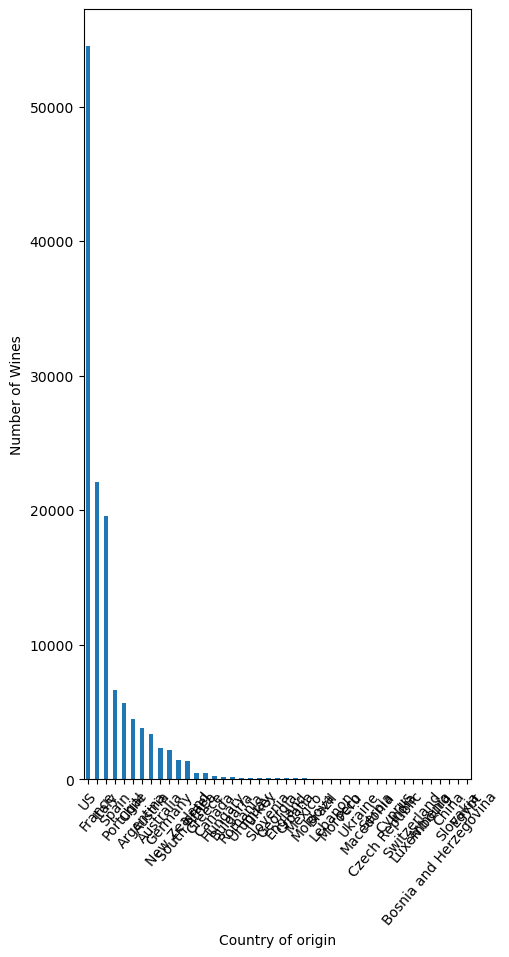

In [55]:
plt.figure(figsize=(5,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of origin")
plt.ylabel("Number of Wines")
plt.show()

In [56]:
# Among 44 countries producing wine, US has more than 50,000 types of wine in the wine review dataset

### Plot - all 44 countries by its highest rated wine.

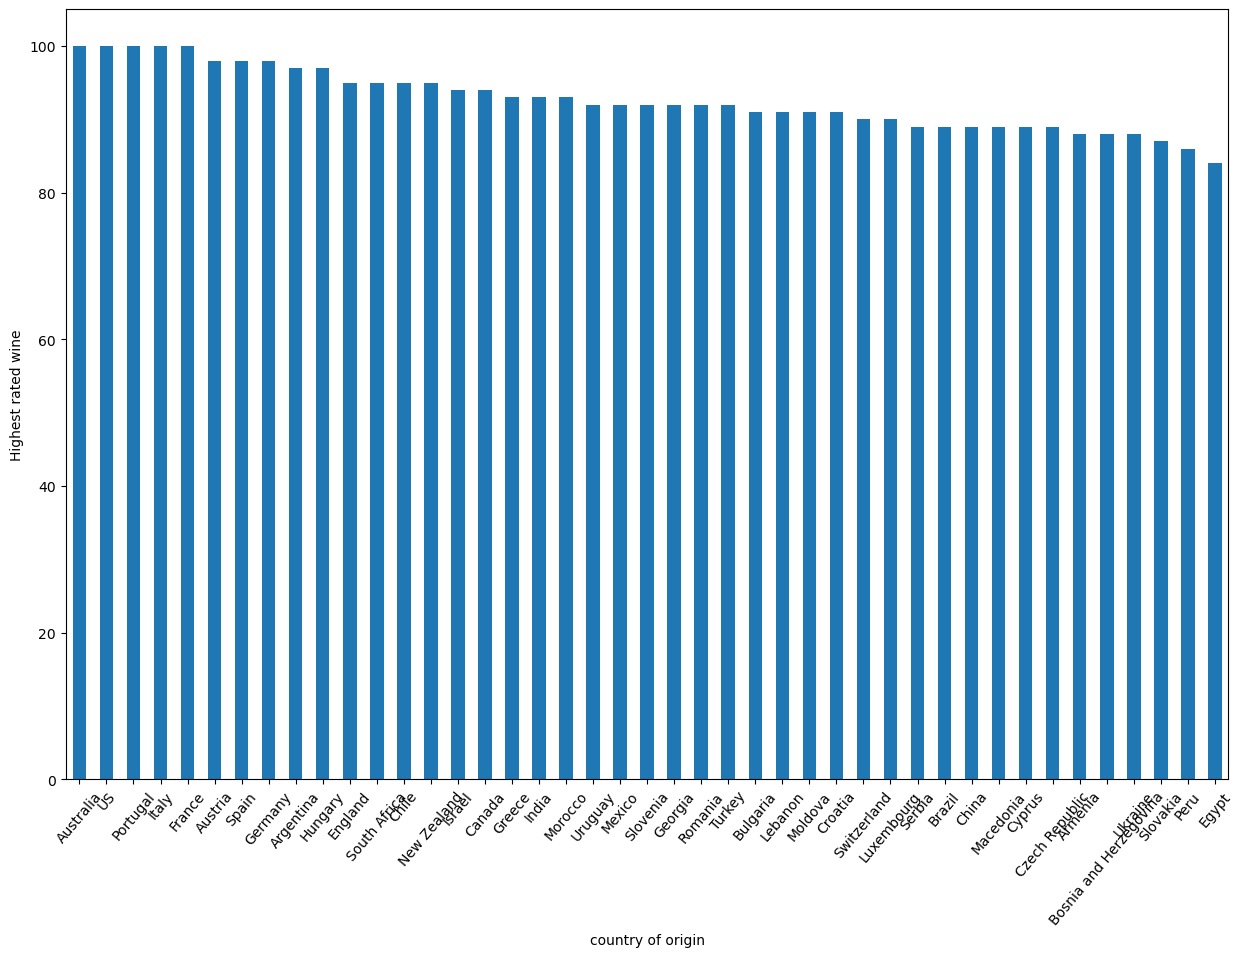

In [57]:
plt.figure(figsize=(15,10))
country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation = 50)
plt.xlabel("country of origin")
plt.ylabel("Highest rated wine")
plt.show()

In [58]:
# Australia, US, Portugal, Italy, and France all have 100 points win

# Setting up wordcloud

In [59]:
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

## First
* Extract the review (text document)
* Create and generate a wordcloud image
* Display the cloud using matplotlib

In [61]:
df.description

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

In [63]:
df.description[0]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [64]:
text = df.description[0]

# create and generate a word cloud image
wordcloud = WordCloud().generate(text)

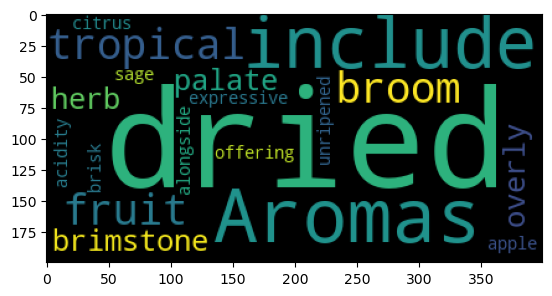

In [67]:
# display the generated Image
plt.imshow(wordcloud)
plt.show()

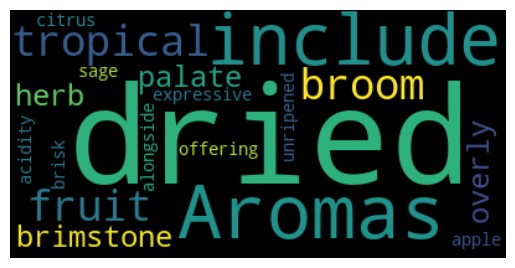

In [68]:
# display the generated Image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [74]:
#  the argument interpolation="bilinear" in the plt.imshow(). 
# This is to make the displayed image appear more smoothly.

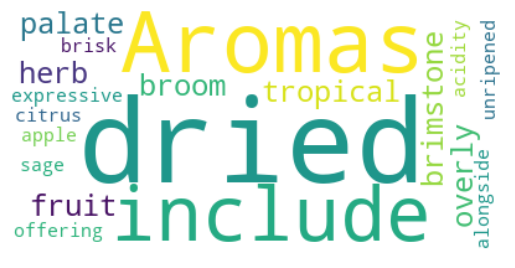

In [75]:
# create and generate a word cloud image
wordcloud = WordCloud(max_words = 150, background_color = "white").generate(text)

# display the generated Image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Save to directory

In [76]:
wordcloud.to_file("images/review.png")

## Combine all the description to one single description

In [77]:
text = "".join(desc for desc in df.description)

In [78]:
len(text)

31531103

In [79]:
# there are 31531103 words in the text

In [80]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [82]:
#update stopwords
stopwords.update(["now","give","finish"])

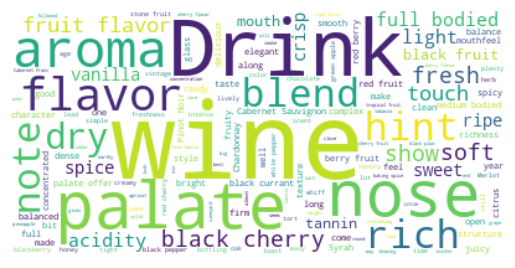

In [109]:
# create and generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords, max_words = 150, background_color = "white").generate(text)

# display the generated Image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Changing To black and White
* set the wordcloud background color to white
* set max_words to 1000
* set width and height to higher quality, 3000 x 2000

In [183]:
# Changing color to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")


In [184]:
# wordcloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500).generate_from_frequencies(text)
wordcloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500).generate(text)

In [185]:
# set the word color to black
wordcloud.recolor(color_func = black_color_func)

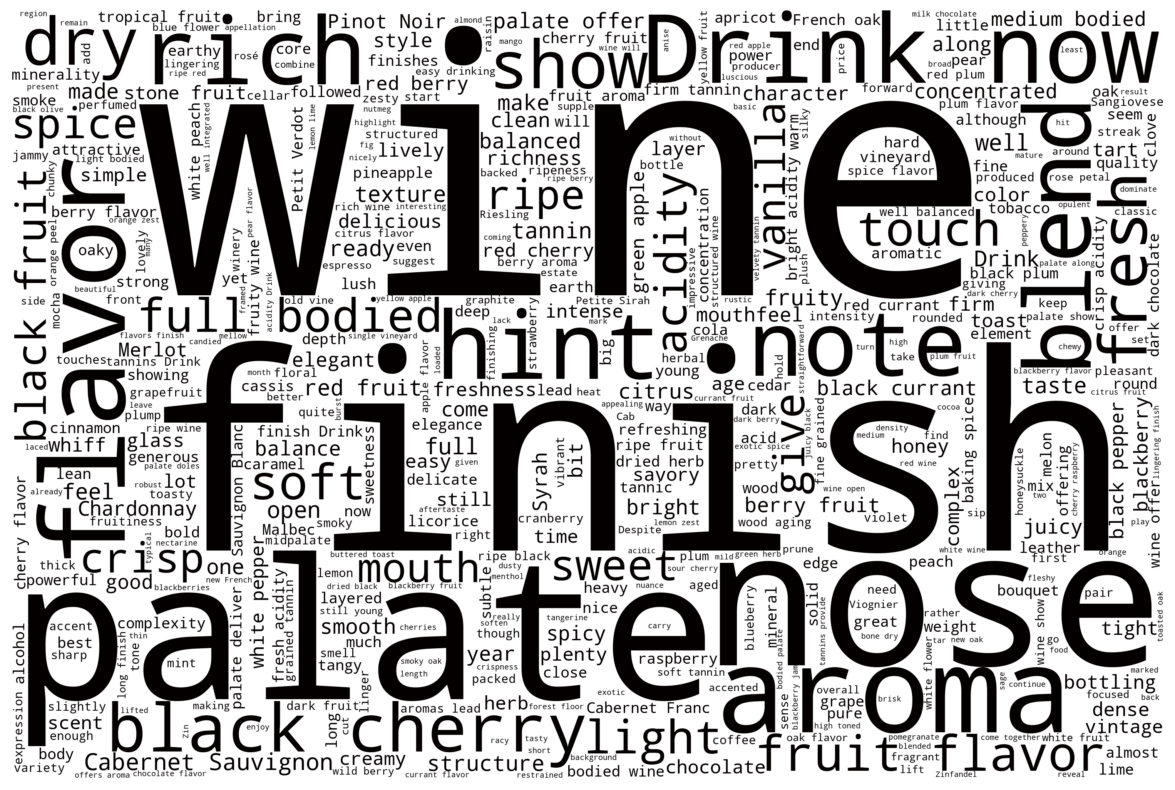

In [186]:
# set the figsize
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [187]:
# store to file
wordcloud.to_file("images/BW.png")

# Adding word cloud to an image

In [151]:
import PIL.Image

In [152]:
python_mask = np.array(PIL.Image.open("pythonLogo.jpeg"))

In [153]:
python_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [156]:
colormap = ImageColorGenerator(python_mask)

In [178]:
# Create a word cloud image
wordcloud = WordCloud(
                    width = 800,
                    height = 400,
                    background_color="white", 
                    max_words=1400, 
                    mask=python_mask,
                    stopwords=stopwords,
                    min_font_size = 4,
                    contour_width=3, 
                    contour_color="black")

In [179]:
# Generate a wordcloud
wordcloud.generate(text)

In [180]:
wordcloud.recolor(color_func=colormap)

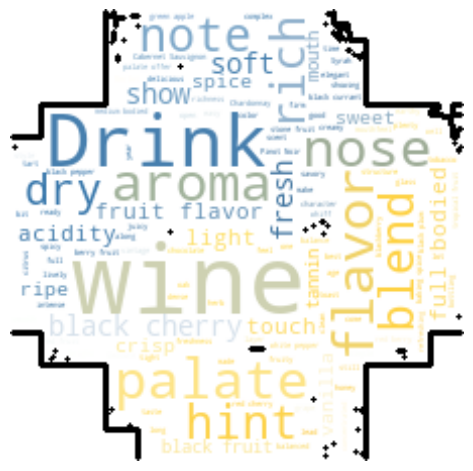

In [181]:
# show
# plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [ ]:
# store to file
wordcloud.to_file("images/python.png")